In [10]:
import warnings
warnings.filterwarnings('ignore')
# Data Wraggling
import random
import numpy as np
import pandas as pd
# Statistics
from math import sqrt
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import PCA

In [4]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [5]:
print(X_train.shape)
print(X_test.shape)

(42000, 784)
(28000, 784)


In [6]:
# training random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = rf.predict(X_test)

print ("Classification Report")
print(classification_report(y_test, y_pred))

print ("Confusion Report")
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2812
           1       0.98      0.99      0.99      3179
           2       0.96      0.97      0.96      2787
           3       0.97      0.95      0.96      2815
           4       0.96      0.97      0.96      2678
           5       0.97      0.96      0.96      2523
           6       0.97      0.98      0.98      2740
           7       0.97      0.96      0.97      2927
           8       0.95      0.95      0.95      2716
           9       0.95      0.95      0.95      2823

    accuracy                           0.97     28000
   macro avg       0.97      0.97      0.97     28000
weighted avg       0.97      0.97      0.97     28000

Confusion Report
[[2767    1    2    0    3    4   12    1   22    0]
 [   0 3143   13    4    5    3    3    2    4    2]
 [   9    2 2698   11   12    1   13   22   18    1]
 [   2    2   37 2670    3   31    2   24  

In [21]:
def scipy_models(X_train, X_test, y_train, y_test, type_model, hidden, learn_rate, run_num, problem):

    print(run_num, ' is our exp run')

    tree_depth = 2

    if problem == 'classifification':
        if type_model == 0:   # SGD 
            model = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, 
                                  max_iter=100, solver='sgd', learning_rate_init=learn_rate) 
            #model.fit(x_train, y_train)

        elif type_model == 1:  # https://scikit-learn.org/stable/modules/tree.html (see how tree can be visualised)
            model = DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
            #model.fit(x_train, y_train)

        elif type_model == 2:
            model = RandomForestClassifier(n_estimators=100, max_depth=tree_depth, random_state=run_num)

        elif type_model == 3:
            model = ExtraTreesClassifier(n_estimators=100, max_depth=tree_depth, random_state=run_num)

    elif problem == 'regression':
        if type_model == 0:  # SGD  
            model = MLPRegressor(hidden_layer_sizes=(hidden*3,), random_state=run_num, 
                                 max_iter=500, solver='adam', learning_rate_init=learn_rate) 

        elif type_model == 1:  
            model = DecisionTreeRegressor(random_state=0, max_depth=tree_depth)

        elif type_model == 2: 
            model = RandomForestRegressor(n_estimators=100, max_depth=tree_depth, random_state=run_num)

        elif type_model == 3: 
            model = ExtraTreeRegressor(n_estimators=100, max_depth=tree_depth, random_state=run_num)            

    # Train the model using the training sets
    model.fit(X_train, y_train)

    if type_model == 1:
        r = export_text(model)
        print(r)

    # Make predictions using the testing set
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train) 

    if problem == 'regression':
        perf_test = np.sqrt(mean_squared_error(y_test, y_pred_test)) 
        perf_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 

    if problem == 'classifification': 
        perf_test = accuracy_score(y_pred_test, y_test) 
        perf_train = accuracy_score(y_pred_train, y_train) 
        cm = confusion_matrix(y_pred_test, y_test) 
        clf_report = classification_report(y_pred_test, y_pred)
        #auc = roc_auc_score(y_pred_test, y_test, average=None)

        print ("Classification Report")
        print(clf_report)

        print ("Confusion Matrix")
        print(cm)

    return perf_test #,perf_train

In [22]:
def dimen_reduction(X_train, X_test, type_model):
    #Scikit-learn is using SVD for PCA

    if type_model == 0:     # SVD solver - full
        pca = PCA(n_components=3, svd_solver='full')    # SVD LAPACK Solver
        
    elif type_model == 1:   # SVD 
        pca = PCA(n_components=3, svd_solver='arpack')  # SVD AROACK Solver

    # note number of components can be changed to 0.95
    # but since we have different train and test data - that can create problems
    # it is best to combine both train and test data and then split them back again

    #data = np.vstack((X_train, X_test)) # something along these lines

    #print(data.shape, ' * ')

    reduced_datatrain = pca.fit_transform(X_train)
    train_varianceratio = pca.explained_variance_ratio_

    reduced_datatest = pca.fit_transform(X_test)
    test_varianceratio = pca.explained_variance_ratio_

    return reduced_datatrain, reduced_datatest, test_varianceratio, train_varianceratio

In [25]:
def main(): 

    max_expruns = 5

    nn_all = np.zeros(max_expruns) 
    forest_all = np.zeros(max_expruns) 
    tree_all = np.zeros(max_expruns) 
    extratree_all = np.zeros(max_expruns)
    
    nnpca_all = np.zeros(max_expruns) 
    forestpca_all = np.zeros(max_expruns) 
    treepca_all = np.zeros(max_expruns) 
    extratreepca_all = np.zeros(max_expruns) 
 
    learn_rate = 0.01
    hidden = 8
    
    # 0 is for PCA (you can try 1 for case of SVD)
    [reduced_datatrain, reduced_datatest, variance_scoretrain, variance_scoretest] = dimen_reduction(X_train, X_test, 0)    
    print('reduced_datatrain')
    print(reduced_datatrain)
    print('variance_scoretrain')
    print(variance_scoretrain)
    
    # classifcation accurary is reported for classification and RMSE for regression
    prob = 'classifification' 
    #prob = 'regression'

    print(prob, ' is our problem') 
 
    for run_num in range(0, max_expruns):    
        
        acc_nn = scipy_models(X_train, X_test, y_train, y_test, 0, hidden, learn_rate, run_num, prob)    # SGD 
        acc_tree = scipy_models(X_train, X_test, y_train, y_test, 1, hidden, learn_rate, run_num, prob)  # Decision Tree
        acc_forest = scipy_models(X_train, X_test, y_train, y_test, 2, hidden, learn_rate, run_num, prob) # Random Forests
        acc_extratree = scipy_models(X_train, X_test, y_train, y_test, 3, hidden, learn_rate, run_num, prob) # Extra Trees
       
        nn_all[run_num] = acc_nn 
        tree_all[run_num] = acc_tree
        forest_all[run_num] = acc_forest
        extratree_all[run_num] = acc_extratree        
        
        # after PCA        
        acc_nnpca = scipy_models(reduced_datatrain, reduced_datatest, y_train, y_test, 0, hidden, learn_rate, run_num, prob)
        acc_treepca = scipy_models(reduced_datatrain, reduced_datatest, y_train, y_test, 1, hidden, learn_rate, run_num, prob) 
        acc_forestpca = scipy_models(reduced_datatrain, reduced_datatest, y_train, y_test, 2, hidden, learn_rate, run_num, prob) 
        acc_extratreepca = scipy_models(reduced_datatrain, reduced_datatest, y_train, y_test, 3, hidden, learn_rate, run_num, prob)
        
        nnpca_all[run_num] = acc_nnpca
        treepca_all[run_num] = acc_treepca
        forestpca_all[run_num] = acc_forestpca
        extratreepca_all[run_num] = acc_extratreepca
        
    print(nn_all,' nn_all')
    print(np.mean(nn_all), ' mean nn_all')
    print(np.std(nn_all), ' std nn_all')
 
    print(tree_all, ' tree_all')
    print(np.mean(tree_all), ' tree_all')
    print(np.std(tree_all), ' tree_all')

    print(forest_all, hidden,' forest_all')
    print(np.mean(forest_all), ' forest_all')
    print(np.std(forest_all), ' forest_all')

    print(extratree_all, ' extra tree_all')
    print(np.mean(extratree_all), ' extra tree_all')
    print(np.std(extratree_all), ' extra tree_all')
    
    
    print(nnpca_all,' nn pca_all')
    print(np.mean(nnpca_all), ' mean nn pca_all')
    print(np.std(nnpca_all), ' std nn pca_all')
 
    print(treepca_all, ' tree_all')
    print(np.mean(treepca_all), ' tree pca_all')
    print(np.std(treepca_all), ' tree pca_all')

    print(forestpca_all, hidden,' forest pca_all')
    print(np.mean(forestpca_all), ' forest pca_all')
    print(np.std(forestpca_all), ' forest pca_all')

    print(extratreepca_all, ' extra tree pca_all')
    print(np.mean(extratreepca_all), ' extra tree pca_all')
    print(np.std(extratreepca_all), ' extra tree pca_all')

    
    
if __name__ == '__main__':
     main() 

reduced_datatrain
[[ 679.06301885  589.70823428 -375.60773342]
 [  77.30070459  380.28195552  152.5007241 ]
 [-105.01086736  789.61934053 -692.72012798]
 ...
 [ -77.96816142 -462.90931971   41.19684075]
 [-763.49329536  629.85667268  182.792218  ]
 [-543.64919452  315.71084172  449.52166693]]
variance_scoretrain
[0.09781175 0.07168405 0.06089555]
classifification  is our problem
0  is our exp run
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.21     28000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00    

Classification Report
              precision    recall  f1-score   support

           0       0.39      0.71      0.50      1537
           1       0.87      0.82      0.84      3427
           2       0.37      0.10      0.16     10396
           3       0.14      0.09      0.11      4403
           4       0.00      0.00      0.00      3200
           5       0.00      0.00      0.00         0
           6       0.03      0.27      0.06       319
           7       0.00      0.01      0.01      2136
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00      2582

    accuracy                           0.19     28000
   macro avg       0.18      0.20      0.17     28000
weighted avg       0.29      0.19      0.21     28000

Confusion Matrix
[[1086    0   60    4   40   40  229    3   42   33]
 [   0 2775   16   17   86   22   21  287   15  188]
 [ 475   38 1038  172 1864  955 1820 1664  839 1531]
 [ 156   69   68  402  682  514   68  940  

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.10      0.18     28000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     28000
   macro avg       0.10      0.01      0.02     28000
weighted avg       1.00      0.10      0.18     28000

Confusion Matrix
[[2812 3179 2787 2815 2678 2523 2740 2927 2716 2823]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.64      0.77      4329
           1       1.00      0.54      0.70      5958
           2       0.65      0.84      0.73      2206
           3       0.68      0.64      0.66      2939
           4       0.77      0.54      0.63      3856
           5       0.07      0.99      0.12       165
           6       0.67      0.83      0.74      2232
           7       0.87      0.73      0.79      3440
           8       0.43      0.89      0.58      1326
           9       0.36      0.66      0.47      1549

    accuracy                           0.66     28000
   macro avg       0.65      0.73      0.62     28000
weighted avg       0.79      0.66      0.69     28000

Confusion Matrix
[[2723    1  147  226   49  606  351   76   98   52]
 [   6 3156  525  459   66  398  255  185  779  129]
 [   7    5 1802   73   35   19  111   51   84   19]
 [  10    3   28 1848    3  741   47    5  

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.21     28000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.11     28000
   macro avg       0.10      0.01      0.02     28000
weighted avg       1.00      0.11      0.21     28000

Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0]
 [2812 3179 2787 2815 2678 2523 2740 2927 2716 2823]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  

Classification Report
              precision    recall  f1-score   support

           0       0.36      0.74      0.49      1387
           1       0.85      0.82      0.84      3315
           2       0.37      0.10      0.16     10370
           3       0.15      0.09      0.12      4599
           4       0.00      0.00      0.00      3264
           5       0.00      0.00      0.00         0
           6       0.04      0.25      0.07       437
           7       0.00      0.01      0.00      1965
           8       0.00      1.00      0.00         1
           9       0.00      0.00      0.00      2662

    accuracy                           0.19     28000
   macro avg       0.18      0.30      0.17     28000
weighted avg       0.28      0.19      0.20     28000

Confusion Matrix
[[1016    0   47    4   35   30  191    3   33   28]
 [   0 2705   13   10   82   17   18  277   15  178]
 [ 510   35 1030  163 1853  940 1838 1650  830 1521]
 [ 181   81   74  429  701  545   76  963  

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.10      0.18     28000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     28000
   macro avg       0.10      0.01      0.02     28000
weighted avg       1.00      0.10      0.18     28000

Confusion Matrix
[[2812 3179 2787 2815 2678 2523 2740 2927 2716 2823]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  

In [26]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Let's start by generating some blobs ---
blob_centers = np.array(
    [[ 0.2,  2.3], [-1.5,  0.6], [-1.5 ,  2.3], 
     [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.5, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [27]:
X[:5]

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       [-1.92096971,  2.30673708],
       [-2.72483644,  1.68358492]])

In [28]:
y[:5]

array([5, 3, 0, 2, 3])

In [29]:
# Machine learning algorithms need to consider all features on an even playing field. 
# The values for all features must be transformed to the same scale.
# Feature scaling: The process of transforming numerical features to use the same scale.
# Important data preprocessing step for most distance-based machine learning algorithms.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

scaled_features[:5]

<IPython.core.display.Javascript object>

array([[-0.73803632, -0.6184501 ],
       [-0.89379375, -0.03106759],
       [ 2.49354422, -0.83985044],
       [-0.05156396,  0.59767482],
       [-0.76152639, -0.19069195]])

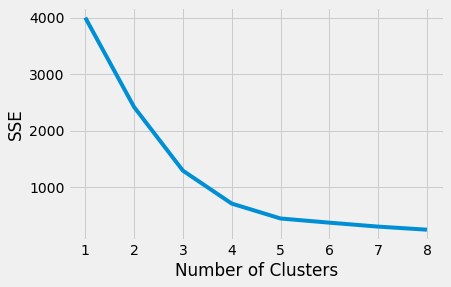

<Figure size 432x288 with 0 Axes>

In [30]:
# Choosing the Appropriate Number of Clusters
# elbow method: run several k-means, increment k with each iteration, and record the SSE

kmeans_kwargs = {
    "init": "random", 
    "n_init": 10, 
    "max_iter": 300, 
    "random_state": 42
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
# Plot SSE vs. number of clusters: SSE continues to decrease as increase k
# elbow point: x-value of this point is thought to be a reasonable trade-off between error and number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 9), sse)
plt.xticks(range(1, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
plt.clf()

In [38]:
# Determining the elbow point in the SSE curve
from kneed import KneeLocator

kl = KneeLocator(range(1, 9), sse, curve="convex", direction="decreasing")
kl.elbow

4

silhouette_scores: 
 [0.41659610179128287, 0.4556562913388938, 0.5573014801937737, 0.6230912487490905, 0.6041992855789394, 0.5969511789377605, 0.5715933165377429]
k_max:  5 
score_max:  0.6230912487490905


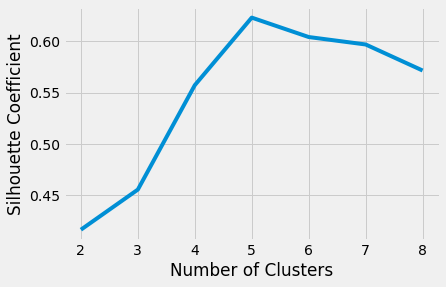

<Figure size 432x288 with 0 Axes>

In [36]:
# Choosing the Appropriate Number of Clusters
# silhouette coefficient: a measure of cluster cohesion and separation, values range between -1 and 1
# silhouette coefficient = (b-a)/max(a, b)
# a is the mean distance to the other instances in the same cluster
# b is the mean nearest-cluster distance

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Start at 2 clusters for silhouette coefficient
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

print('silhouette_scores: \n', silhouette_coefficients)
score_max = np.max(silhouette_coefficients)
k_max = np.argmax(silhouette_coefficients) + 2
print('k_max: ', k_max, '\nscore_max: ' , score_max)    

# Plotting the average silhouette scores for each k 
# The best choice for k with the maximum score
plt.style.use("fivethirtyeight")
plt.plot(range(2, 9), silhouette_coefficients)
plt.xticks(range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
plt.clf()